In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix

from tqdm import tqdm
import plotly.express as px
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [150]:
df = pd.read_csv(r'abalone.data')

In [151]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [217]:
target = df.Sex.map({'M':1,'F':2,'I':3})
features = df.iloc[:,2:]
minmax, scaler = MinMaxScaler(), StandardScaler()

## Без нормализации

In [229]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=13)
clf = RandomForestClassifier().fit(X_train, y_train)
print(f'accuracy on train: {clf.score(X_train, y_train)}')
print(f'accuracy on test: {clf.score(X_test, y_test)}')
print(f'cross val score: {cross_val_score(clf, X_train, y_train, cv=5)}')
print(f'mean cross val score: {cross_val_score(clf, X_train, y_train, cv=5).mean()}')


accuracy on train: 1.0
accuracy on test: 0.5489485134155185
cross val score: [0.55178571 0.53928571 0.50535714 0.53667263 0.54382826]
mean cross val score: 0.5407449527216969


## Standart Scaler

In [219]:
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(features), target, test_size=0.5, random_state=13)
clf = RandomForestClassifier().fit(X_train, y_train)
print(f'accuracy on train: {clf.score(X_train, y_train)}')
print(f'accuracy on test: {clf.score(X_test, y_test)}')
print(f'cross val score: {cross_val_score(clf, X_train, y_train, cv=5)}')
print(f'mean cross val score: {cross_val_score(clf, X_train, y_train, cv=5).mean()}')

accuracy on train: 1.0
accuracy on test: 0.5385351842987075
cross val score: [0.57894737 0.50239234 0.54784689 0.52757794 0.52997602]
mean cross val score: 0.5292049613897398


## MinMax Scaler

In [220]:
X_train, X_test, y_train, y_test = train_test_split(minmax.fit_transform(features), target, test_size=0.5, random_state=13)
clf = RandomForestClassifier().fit(X_train, y_train)
print(f'accuracy on train: {clf.score(X_train, y_train)}')
print(f'accuracy on test: {clf.score(X_test, y_test)}')
print(f'cross val score: {cross_val_score(clf, X_train, y_train, cv=5)}')
print(f'mean cross val score: {cross_val_score(clf, X_train, y_train, cv=5).mean()}')

accuracy on train: 1.0
accuracy on test: 0.5380564863571087
cross val score: [0.56220096 0.52392344 0.55502392 0.52038369 0.54196643]
mean cross val score: 0.534950030406297


## Перебор размера случайного леса

In [222]:
n_estimators = range(10,101, 10)
scores_on_test = []
scores_on_train = []
for n in tqdm(n_estimators):
    clf_forest = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
    scores_on_test.append(clf_forest.score(X_test, y_test))
    scores_on_train.append(clf_forest.score(X_train, y_train))

100%|██████████| 10/10 [00:02<00:00,  4.60it/s]


## Метрика accuracy в зависимости от размера леса 

In [242]:
report = pd.DataFrame(data={'test_score': scores_on_test,
                  'train_score': scores_on_train,
                  'n_estimators': n_estimators})
report.head()

,test_score,train_score,n_estimators
0,0.531833,0.983716,10
1,0.535184,0.995211,20
2,0.543322,0.999521,30
3,0.548109,0.999521,40
4,0.550024,1.000000,50


In [224]:
px.scatter(data_frame=report, x='n_estimators', y='test_score', color='test_score', size='test_score')

In [225]:
px.scatter(data_frame=report, x='n_estimators', y='train_score', color='train_score', size='train_score')

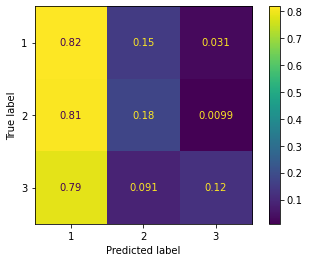

In [241]:
plot_confusion_matrix(clf_forest, X_test, y_test,labels=target.unique(), normalize='true')